In [1]:
import re 
import string 
import pandas as pd 
import numpy as np 
import math 
from tqdm import tqdm
import json

from pandas.core.frame import DataFrame
from IPython.core.display import display, HTML


import re, nltk, spacy, gensim
from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy 
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint


nlp = spacy.load("en_core_web_sm")

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 cat
 best
 climbing
 ninja
 ve
 photo
 taken
 belly
 merley
 kitten
Cluster 1:
 google
 feedback
 map
 app
 impressed
 incredible
 translate
 key
 extension
 chrome


Prediction
[1]
[0]


In [2]:
data= pd.read_csv("speeches.csv")
usage=data.sample(10000)

FileNotFoundError: [Errno 2] No such file or directory: 'speeches.csv'

In [5]:
usage.to_csv("sample.csv")

In [10]:
data = pd.read_csv('sample.csv')
data = data.sort_values('year')
data

,Unnamed: 0,id,speech,display_as,party,constituency,mnis_id,date,time,colnum,speech_class,major_heading,minor_heading,oral_heading,year,hansard_membership_id,speakerid,person_id,speakername,url
6280,28237,uk.org.publicwhip/debate/1979-11-27a.1096.7,Is the Minister aware that in the last two mon...,Robert Maclennan,Labour,Caithness and Sutherland,578.0,1979-11-27,NaN,1096.0,Speech,Oral Answers to Questions — DEFENCE,Garvie Island,NaN,1979,8447.0,uk.org.publicwhip/member/2994,NaN,Mr. Maclennan,NaN
2137,28375,uk.org.publicwhip/debate/1979-11-27a.1136.2,Is not the right hon. Gentleman contradicting ...,Roger Moate,Conservative,Faversham,922.0,1979-11-27,16:40:00,1136.0,Speech,Orders of the Day — TRANSPORT BILL,NaN,NaN,1979,9151.0,uk.org.publicwhip/member/18434,NaN,Mr. Roger Moate,NaN
9353,29105,uk.org.publicwhip/debate/1979-11-29a.1477.7,Does the right hon. Gentleman recall that he s...,James Lamond,Labour,Oldham East,894.0,1979-11-29,NaN,1477.0,Speech,Oral Answers to Questions — ORAL ANSWERS TO QU...,PRIME MINISTER (ENGAGEMENTS),NaN,1979,7367.0,uk.org.publicwhip/member/16997,NaN,Mr. Lamond,NaN
6748,23328,uk.org.publicwhip/debate/1979-11-12a.1080.3,"Question put, That the amendment be made:",Unknown,NaN,NaN,NaN,1979-11-12,00:30:00,1080.0,Procedural,Clause 3,OTHER POWERS WITH RESPECT TO SOUTHERN RHODESIA,NaN,1979,NaN,NaN,NaN,Unknown,NaN
8012,29046,uk.org.publicwhip/debate/1979-11-29a.1470.2,At a most recent census in August 1979 the Uni...,Alick Buchanan-Smith,Conservative,North Angus and Mearns,727.0,1979-11-29,NaN,1470.0,Speech,Oral Answers to Questions — ORAL ANSWERS TO QU...,Pigs (Breeding Herd),NaN,1979,16624.0,uk.org.publicwhip/member/11624,NaN,Mr. Buchanan-Smith,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,2684453,uk.org.publicwhip/debate/2021-02-24a.1024.2,"Motion made, and Question put forthwith (Stand...",Unknown,NaN,NaN,NaN,2021-02-24,18:56:00,1024.0,Procedural,Telecommunications Infrastructure (Leasehold P...,NaN,NaN,2021,NaN,NaN,NaN,Unknown,NaN
6168,2693949,uk.org.publicwhip/debate/2021-04-28c.361.4,I have regular discussions with ministerial co...,David Duguid,Conservative,Banff and Buchan,4606.0,2021-04-28,NaN,361.0,Speech,Scotland,COP26,NaN,2021,NaN,NaN,uk.org.publicwhip/person/25664,David Duguid,NaN
6193,2683641,uk.org.publicwhip/debate/2021-02-22b.655.7,I am really grateful to my hon. Friend for his...,Boris Johnson,Conservative,Uxbridge and South Ruislip,1423.0,2021-02-22,15:51:00,655.0,Speech,Covid-19: Road Map,NaN,NaN,2021,NaN,NaN,uk.org.publicwhip/person/10999,Boris Johnson,NaN
5839,2681899,uk.org.publicwhip/debate/2021-02-04b.1186.0,I welcome this debate and thank my hon. Friend...,Robert Halfon,Conservative,Harlow,3985.0,2021-02-04,15:45:00,1186.0,Speech,Towns Fund,NaN,NaN,2021,NaN,NaN,uk.org.publicwhip/person/24784,Robert Halfon,NaN


In [11]:
def extract_noun(text):
        return [(chunk.text) for chunk in nlp(text).noun_chunks]
data['Noun'] = data['speech'].apply(extract_noun)

In [13]:
def extract_named_ents(text):
    return [(ent.text, ent.label_) for ent in nlp(text).ents]
data['Name_enitity'] = data['speech'].apply(extract_named_ents)

In [14]:
def subtree_matcher(doc):
    subjpass = 0

    for i,tok in enumerate(doc):
        
    # find dependency tag that contains the text "subjpass"    
       if tok.dep_.find("subjpass") == True:
            subjpass = 1

    x = ''
    y = ''
    z = ''

  # if subjpass == 1 then sentence is passive
    if subjpass == 1:
        for i,tok in enumerate(doc):
            if tok.dep_.find("subj") == True:
                if(doc[i-1].dep_ in['amod','compound']):
                    y = doc[i-1].text + ' '+tok.text
                else:
                    y=tok.text
                                   
            if(tok.dep_.find('ROOT')==0):
                z=tok.text
                
            if tok.dep_.endswith("obj") == True:
                if(doc[i-1].dep_ in['amod','compound']):
                    x = doc[i-1].text + ' '+tok.text  
                else:
                    x = tok.text
  
  # if subjpass == 0 then sentence is not passive
    else:
        for i,tok in enumerate(doc):
            if tok.dep_.endswith("subj") == True:
                if(doc[i-1].dep_ in['amod','compound']):
                    x = doc[i-1].text + ' '+tok.text 
                else:
                    x = tok.text
                    
            if(tok.dep_.find('ROOT')==0):
                z=tok.text

            if tok.dep_.endswith("obj") == True:
                if(doc[i-1].dep_ in['amod','compound']):
                    y = doc[i-1].text + ' '+tok.text
                else:
                    y = tok.text

    return x,y,z

def get_relation(text):
    document = nlp(text)
    t = [sent.text for sent in document.sents]
    re =  []
    for i in t:
        i = nlp(i)
        re.append(subtree_matcher(i))
    return re

data['RE'] = data['speech'].apply(get_relation)   

In [16]:
def extract_verb(text):
    return [token for token in nlp(text)if token.pos_=='VERB']
data['Verb'] = data['speech'].apply(extract_verb)

In [17]:
def N_pre_N(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:

        # look for prepositions
        if token.pos_=='ADP':

            phrase = ''
            
            # if its head word is a noun
            if token.head.pos_=='NOUN':
                
                # append noun and preposition to phrase
                phrase += token.head.text
                phrase += ' '+token.text

                # check the nodes to the right of the preposition
                for right_tok in token.rights:
                    # append if it is a noun or proper noun
                    if (right_tok.pos_ in ['NOUN','PROPN']):
                        phrase += ' '+right_tok.text
                
                if len(phrase)>2:
                    sent.append(phrase)
                
    return sent
def get_r(text):
    document = nlp(text)
    t = [sent.text for sent in document.sents]
    re =  []
    for i in t:
        i = nlp(i)
        re.append(subtree_matcher(i))
    return re

data['RE2'] = data['speech'].apply(get_r) 

In [18]:
def get_pps(text):
    "Function to get PPs from a parsed document."
    pps = []
    doc = nlp(text)
    for token in doc:
        # Try this with other parts of speech for different subtrees.
        if token.pos_ == 'ADP':
            pp = ' '.join([tok.orth_ for tok in token.subtree])
            pps.append(pp)
    return pps
data['Pres'] = data['speech'].apply(get_pps) 

In [52]:
# topic matching
po = pd.read_csv('politics.csv')
del po['Unnamed: 0']
politics = po['term'].tolist()
# using pattern matching
def group(text):
    pattern = [r'\b(?i)'+ i +r'\b' for i in politics]

    
    flag = 0
    for pat in patterns:
        if re.search(pat, text) != None:
            flag = 1
            break
    return flag
 # flag 1 == politics
#flag 2 = environemnt and protection
#flag 3 = economy
#flag 4 = education
def topic(text):
    document = nlp(text)
    t = [sent.text for sent in document.sents]
    re = []
    for i in t:
        re.append(group(i))
    if 1 in re:
        return 1
    else:
        return None
    
data['topic'] = data['speech'].apply(topic)

<ipython-input-52-38edb4384768>:12: DeprecationWarning: Flags not at the start of the expression '\\b(?i)scheme\\b'
  if re.search(pat, text) != None:
<ipython-input-52-38edb4384768>:12: DeprecationWarning: Flags not at the start of the expression '\\b(?i)campaign\\b'
  if re.search(pat, text) != None:
<ipython-input-52-38edb4384768>:12: DeprecationWarning: Flags not at the start of the expression '\\b(?i)initiative\\b'
  if re.search(pat, text) != None:
<ipython-input-52-38edb4384768>:12: DeprecationWarning: Flags not at the start of the expression '\\b(?i)conference\\b'
  if re.search(pat, text) != None:
<ipython-input-52-38edb4384768>:12: DeprecationWarning: Flags not at the start of the expression '\\b(?i)agreement\\b'
  if re.search(pat, text) != None:
<ipython-input-52-38edb4384768>:12: DeprecationWarning: Flags not at the start of the expression '\\b(?i)alliance\\b'
  if re.search(pat, text) != None:


In [54]:
#specific expression
# rule to extract initiative name
def sent_subtree(text):
    
    # pattern match for schemes or initiatives
    pattern = [r'\b(?i)'+ i +r'\b' for i in politics]
    
    schemes = []
    doc = nlp(text)
    flag = 0
    # if no initiative present in sentence
    for pat in patterns:
        
        if re.search(pat, text) != None:
            flag = 1
            break
    
    if flag == 0:
        return schemes

    # iterating over sentence tokens
    for token in doc:

        for pat in patterns:
                
            # if we get a pattern match
            if re.search(pat, token.text) != None:

                word = ''
                # iterating over token subtree
                for node in token.subtree:
                    # only extract the proper nouns
                    if (node.pos_ == 'PROPN'):
                        word += node.text+' '

                if len(word)!=0:
                    schemes.append(word)

    return schemes      

def politicsPhase(text):
    document = nlp(text)
    t = [sent.text for sent in document.sents]
    re = []
    for i in t:
        re.append(sent_subtree(i))
    return re
    
data['politics_phase'] = data['speech'].apply(politicsPhase)

In [65]:


# subgroup data is too small, speicific classify with machine larning method, 
#1. td-idf, and LDA , using google colab to train and download the model.
#next work, visulasation and optimize

data
data.to_csv('t.csv')

In [ ]:
#LDA method frquency decide the topics
# remove stopwords
# Sklearn
#simple preprocessing
from spacy.lang.en.stop_words import STOP_WORDS
from textblob import TextBlob

#Implementation of stop words:
def remove_stop(text):
    filterd = []
    doc = nlp(text)
    for word in doc:
        if word.is_stop == False:
            filtered.append(word)
    return filtered
def lemma(text):
    text = nlp(text)
    sent = []
    for word in comment:
        sent.append(word.lemma_)    
    return " ".join(sent)
#keep only nouns
def nouns(text):
    blob = TextBlob(comment)
    x = blob.noun_phrases
    return " ".join(x)
def pos(text):
    text = nlp(text)
    nouns = []
    i=0
    while i < len(text)-1:
        if text[i].pos_ == 'NOUN':
            nouns.append(text[i])
        i=i+1
    return nouns

In [5]:
import pandas as pd
df_version = pd.read_csv('result.csv')
df_version

,Unnamed: 0,Unnamed: 0.1,id,speech,display_as,party,constituency,mnis_id,date,time,...,Name_enitity,topic,politics_phase,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,nPn,nVn,verb
0,0,0,uk.org.publicwhip/debate/1979-11-27a.1096.7,Is the Minister aware that in the last two mon...,Robert Maclennan,Labour,Caithness and Sutherland,578.0,1979-11-27,NaN,...,"[('the last two months', 'DATE'), ('300 yards'...",NaN,"[[], [], []]",0,8.0,0.1397,"industry, company, make, market, british, busi...","[['fishermen', 'from', 'constituency'], ['yard...","[['shells', 'vessels', 'Is'], ['they', 'last y...","[been, have, alarmed, landed, entered, appear,..."
1,1,1,uk.org.publicwhip/debate/1979-11-27a.1136.2,Is not the right hon. Gentleman contradicting ...,Roger Moate,Conservative,Faversham,922.0,1979-11-27,16:40:00,...,"[('Gentleman', 'PERSON')]",NaN,"[[], [], [], [], [], []]",1,0.0,0.1437,"local, service, area, authority, constituency,...","[['form', 'of', 'buses']]","[['Gentleman', 'himself', 'contradicting'], ['...","[contradicting, envisages, described, told, co..."
2,2,2,uk.org.publicwhip/debate/1979-11-29a.1477.7,Does the right hon. Gentleman recall that he s...,James Lamond,Labour,Oldham East,894.0,1979-11-29,NaN,...,"[('Gentleman', 'PERSON'), ('earlier this year'...",NaN,"[[], [], [], []]",2,3.0,0.1612,"country, people, government, political, agree,...","[['Friend', 'in', 'manner']]","[['colour', 'British citizens', 'recall'], ['h...","[Does, said, fishing, regarded, reconcile, pre..."
3,3,3,uk.org.publicwhip/debate/1979-11-12a.1080.3,"Question put, That the amendment be made:",Unknown,NaN,NaN,NaN,1979-11-12,00:30:00,...,[],NaN,[[]],3,5.0,0.1214,"bill, make, order, amendment, clause, power, l...",[],[],"[put, made]"
4,4,4,uk.org.publicwhip/debate/1979-11-29a.1470.2,At a most recent census in August 1979 the Uni...,Alick Buchanan-Smith,Conservative,North Angus and Mearns,727.0,1979-11-29,NaN,...,"[('August 1979', 'DATE'), ('United Kingdom', '...",NaN,[[]],4,4.0,0.1172,"case, public, law, police, issue, individual, ...","[['census', 'in', 'August'], ['herd', 'of', 's...","[['breeding herd', 'pig', 'was']]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,uk.org.publicwhip/debate/2021-02-24a.1024.2,"Motion made, and Question put forthwith (Stand...",Unknown,NaN,NaN,NaN,2021-02-24,18:56:00,...,"[('Standing Order No', 'WORK_OF_ART'), ('83A(7...",1.0,"[[], ['Programme ', 'Programme ']]",9995,5.0,0.2410,"bill, make, order, amendment, clause, power, l...","[['Order', 'of', 'January'], ['Order', 'of', '...","[['following provisions', 'January', 'made']]","[made, put, Standing, following, apply, supple..."
9996,9996,9996,uk.org.publicwhip/debate/2021-04-28c.361.4,David Duguid have regular discussions with min...,David Duguid,Conservative,Banff and Buchan,4606.0,2021-04-28,NaN,...,"[('Scotland', 'GPE'), ('State', 'ORG'), ('Unit...",NaN,"[[], []]",9996,3.0,0.1930,"country, people, government, political, agree,...","[['discussions', 'with', 'colleagues'], ['deli...","[['COP26', 'Scotland', 'have'], ['that', 'Unit...","[have, offers, devolved, brings, devolved, sup..."
9997,9997,9997,uk.org.publicwhip/debate/2021-02-22b.655.7,Boris Johnson am really grateful to my hon. Fr...,Boris Johnson,Conservative,Uxbridge and South Ruislip,1423.0,2021-02-22,15:51:00,...,"[('1.3 million', 'CARDINAL'), ('£1.3 billion',...",NaN,"[[], [], [], [], [], []]",9997,9.0,0.1381,"work, important, friend, support, ensure, make...","[['Friend', 'for', 'question'], ['result', 'of...","[['Boris Johnson', 'hon', 'am'], ['who', 'pand...","[support, suffered, distributed, put, focus, f..."
9998,9998,9998,uk.org.publicwhip/debate/2021-02-04b.1186.0,Robert Halfon welcome this debate and thank my...,Robert Halfon,Conservative,Harlow,3985.0,2021-02-04,15:45:00,...,"[('Paul Bristow', 'PERSON'), ('Harlow', 'NORP'...",NaN,"[[], [], [], [], [], [], [], [], [], [], [], [...",9998,0.0,0.2981,"local, service, area, authority, co

In [7]:
y=pd.Dominant_Topic.values.tolist()
print(y)
print(set(y))

[8.0, 0.0, 3.0, 5.0, 4.0, 8.0, 5.0, 8.0, 0.0, 2.0, 0.0, 0.0, 9.0, 5.0, 1.0, 2.0, 0.0, 2.0, 1.0, 5.0, 9.0, 1.0, 0.0, 8.0, 5.0, 6.0, 7.0, 8.0, 0.0, 5.0, 3.0, 7.0, 1.0, 2.0, 5.0, 3.0, 1.0, 1.0, 3.0, 7.0, 0.0, 5.0, 5.0, 1.0, 5.0, 1.0, 1.0, 0.0, 7.0, 7.0, 4.0, 2.0, 3.0, 8.0, 3.0, 3.0, 1.0, 6.0, 4.0, 1.0, 0.0, 1.0, 0.0, 8.0, 0.0, 1.0, 1.0, 7.0, 2.0, 0.0, 1.0, 1.0, 8.0, 7.0, 0.0, 7.0, 4.0, 0.0, 2.0, 2.0, 4.0, 0.0, 0.0, 3.0, 5.0, 1.0, 1.0, 5.0, 7.0, 3.0, 5.0, 7.0, 7.0, 8.0, 5.0, 1.0, 2.0, 7.0, 8.0, 9.0, 1.0, 2.0, 3.0, 6.0, 2.0, 5.0, 0.0, 1.0, 2.0, 7.0, 1.0, 1.0, 8.0, 7.0, 6.0, 7.0, 2.0, 1.0, 2.0, 5.0, 8.0, 4.0, 3.0, 5.0, 5.0, 7.0, 1.0, 0.0, 8.0, 5.0, 1.0, 2.0, 3.0, 1.0, 8.0, 8.0, 5.0, 4.0, 8.0, 3.0, 5.0, 7.0, 1.0, 7.0, 4.0, 6.0, 4.0, 1.0, 7.0, 5.0, 6.0, 5.0, 1.0, 7.0, 3.0, 4.0, 3.0, 3.0, 0.0, 8.0, 5.0, 1.0, 6.0, 7.0, 1.0, 7.0, 7.0, 0.0, 1.0, 2.0, 5.0, 1.0, 5.0, 7.0, 4.0, 0.0, 0.0, 5.0, 6.0, 3.0, 5.0, 7.0, 3.0, 8.0, 3.0, 2.0, 0.0, 8.0, 2.0, 5.0, 2.0, 1.0, 5.0, 0.0, 4.0, 2.0, 1.0, 1.0, 5.0, 8.0,

In [24]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\xieme\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [32]:

def plot_associations(text, k=0.4, font_size=32):
    '''
    -The input text is a string of sentences ending in periods. If the text does not have any period, it does not produce a plot.
    -The output is a plot of the nouns in the text connected to the adjectives and verbs as they appear in the text.
    -k is the 'spread factor' - lower the k, lesser the intra-cluster spread,and vice versa.
    -The nodes are sized according to their degree.
    -Nodes are colored red if they are nouns, yellow if they are adjectives, and blue if they are verbs.
    '''
    nouns_in_text = []
    is_noun = lambda pos: pos[:2] == 'NN'

    for sent in text.split('.')[:-1]:   
        tokenized = nltk.word_tokenize(sent)
        nouns=[word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]
        nouns_in_text.append(' '.join([word for word in nouns if not (word=='' or len(word)==1)]))

    nouns_list = []
    
    for sent in nouns_in_text:
        temp = sent.split(' ')
        for word in temp:
            if word not in nouns_list:
                nouns_list.append(word)

    df = pd.DataFrame(np.zeros(shape=(len(nouns_list),2)), columns=['Nouns', 'Verbs & Adjectives'])
    df['Nouns'] = nouns_list

    is_adjective_or_verb = lambda pos: pos[:2]=='JJ' or pos[:2]=='VB'
    for sent in text.split('.'):
        for noun in nouns_list:
            if noun in sent:
                tokenized = nltk.word_tokenize(sent)
                adjectives_or_verbs = [word for (word, pos) in nltk.pos_tag(tokenized) if is_adjective_or_verb(pos)]
                ind = df[df['Nouns']==noun].index[0]
                df['Verbs & Adjectives'][ind]=adjectives_or_verbs
    return df
                

In [33]:
import re

## The first paragraph of Wikipedia's article on itself
text = "Wikipedia was launched on January 15, 2001, by Jimmy Wales and Larry Sanger.[10] Sanger coined its name,\
 as a portmanteau of wiki[notes 3] and 'encyclopedia'. Initially an English-language encyclopedia,\
versions in other languages were quickly developed. With 5,748,461 articles,[notes 4] the English Wikipedia is the largest of\
the more than 290 Wikipedia encyclopedias. Overall, Wikipedia comprises more than 40 million articles in 301 different languages[14] \
and by February 2014 it had reached 18 billion page views and nearly 500 million unique visitors per month.[15] In 2005, Nature published\
a peer review comparing 42 science articles from Encyclopadia Britannica and Wikipedia and found that \
Wikipedia's level of accuracy approached that of Britannica.[16] Time magazine stated that the open-door policy of allowing anyone to \
edit had made Wikipedia the biggest and possibly the best encyclopedia in the world and it was testament to the vision of Jimmy Wales.[17]\
Wikipedia has been criticized for exhibiting systemic bias, for presenting a mixture of 'truths, half truths, and some falsehoods',\
[18] and for being subject to manipulation and spin in controversial topics.[19] In 2017, Facebook announced that it would help \
readers detect fake news by suitable links to Wikipedia articles. YouTube announced a similar plan in 2018."\

text = re.sub("[\[].*?[\]]", "", text) ## Remove brackets and anything inside it
# You can do more processing (like stopword removal, stemming, lemmatization, etc if you want)

df = plot_associations(text, k=0.5, font_size=26)


<ipython-input-32-ef478c5524b0>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Verbs & Adjectives'][ind]=adjectives_or_verbs


In [43]:
import pandas as pd
js = df.to_dict(orient="index");
df.columns = ['name','imports']
df

,name,imports
0,Wikipedia,"[announced, help, detect, fake, suitable]"
1,January,"[was, launched]"
2,Jimmy,"[stated, open-door, allowing, edit, made, bigg..."
3,Wales,"[stated, open-door, allowing, edit, made, bigg..."
4,Larry,"[was, launched]"
5,Sanger,[coined]
6,name,[coined]
7,portmanteau,[coined]
8,wiki,[coined]
9,'encyclopedia,[coined]


In [49]:
pd.DataFrame([[x] + [z] for x, y in df.values for z in y],columns=df.columns) #dataframe拆解成多列

,name,imports
0,Wikipedia,announced
1,Wikipedia,help
2,Wikipedia,detect
3,Wikipedia,fake
4,Wikipedia,suitable
...,...,...
292,links,suitable
293,YouTube,announced
294,YouTube,similar
295,plan,announced


In [44]:
df.to_json (r'file.json', orient="records")

<Figure size 2160x1440 with 0 Axes>

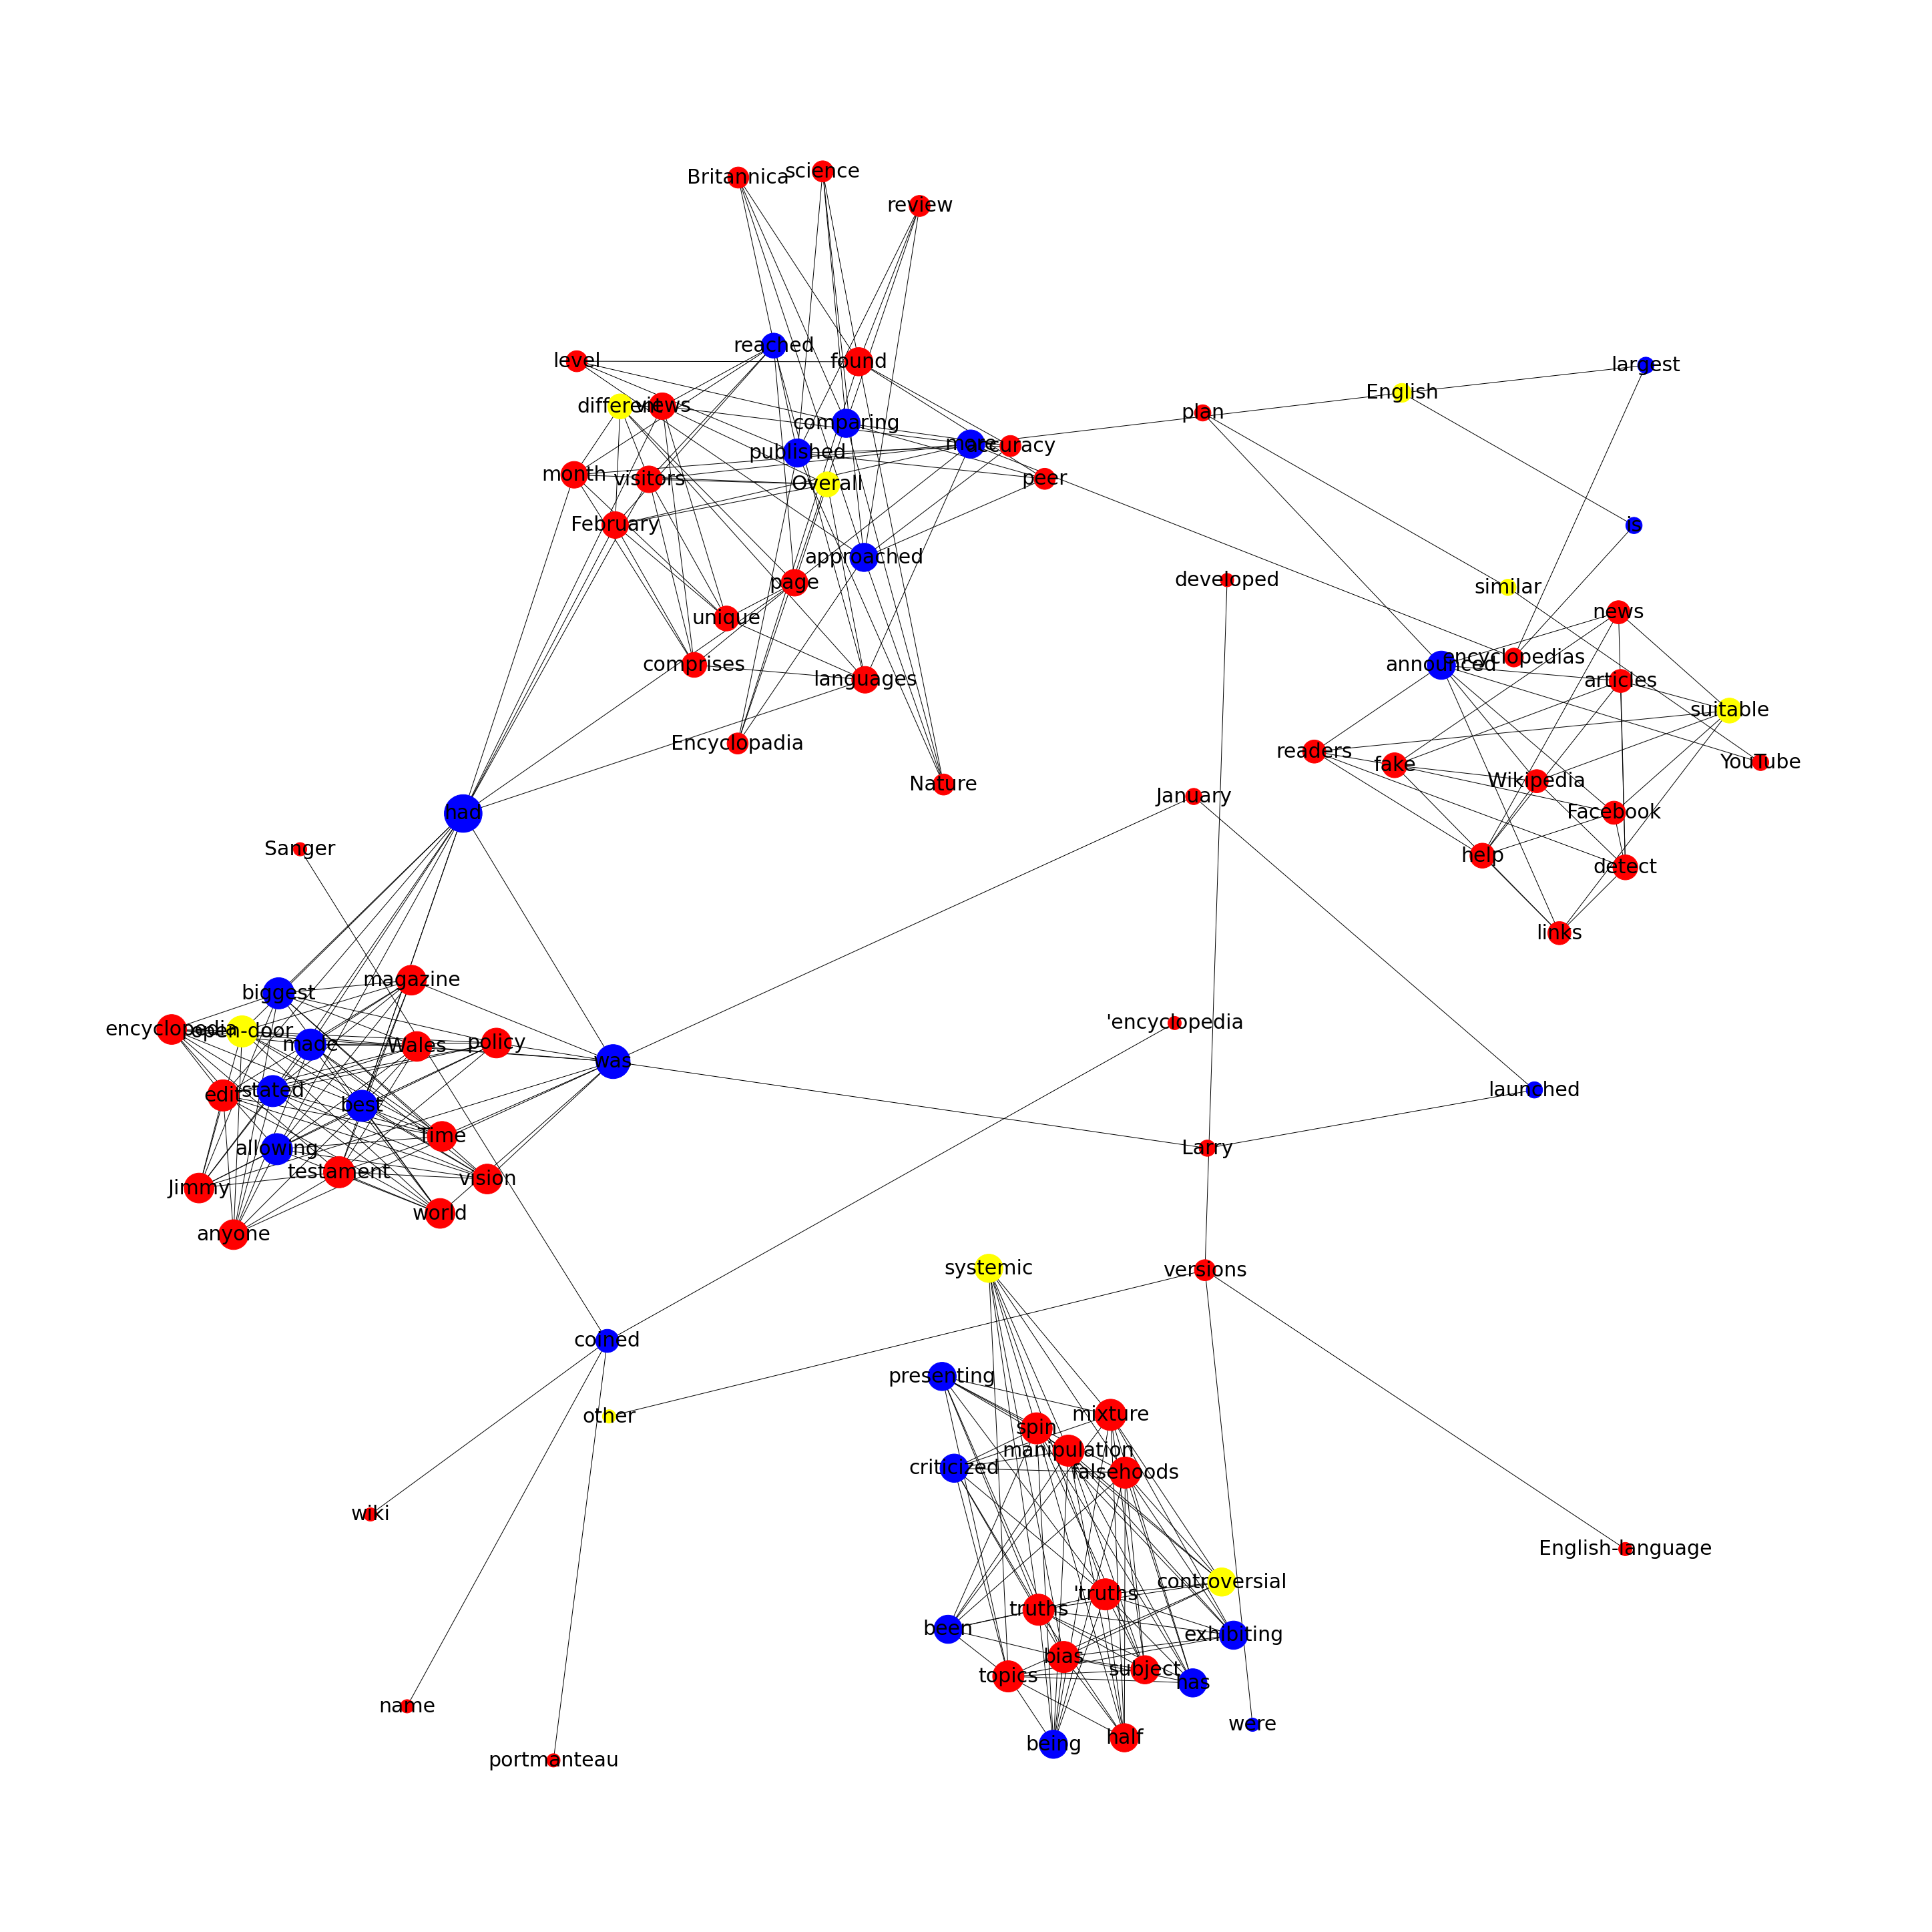

In [36]:
k= 0.5
font_size = 30
fig = plt.figure(figsize=(30,20))
G = nx.Graph()
color_map=[]
for i in range(len(df)):
    G.add_node(df['Nouns'][i])
    color_map.append('blue')
    for word in df['Verbs & Adjectives'][i]:
        G.add_edges_from([(df['Nouns'][i], word)])

pos = nx.spring_layout(G, 0.5)

d = nx.degree(G)
node_sizes = []
for i in d:
    _, value = i
    node_sizes.append(value)

color_list = []
for i in G.nodes:
    value = nltk.pos_tag([i])[0][1]
    if (value=='NN' or value=='NNP' or value=='NNS'):
        color_list.append('red')
    elif value=='JJ':
        color_list.append('yellow')
    else:
        color_list.append('blue')

plt.figure(figsize=(40,40))
nx.draw(G, pos, node_size=[(v+1)*200 for v in node_sizes], with_labels=True, node_color=color_list, font_size=font_size)
plt.show() 

In [45]:
print(G)

Graph with 93 nodes and 297 edges


In [48]:
import json
import networkx as nx
from networkx.readwrite import json_graph
with open('networkdata1.json', 'w') as outfile1:
    outfile1.write(json.dumps(json_graph.node_link_data(G)))

In [1]:
import nltk; nltk.download('stopwords')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

#import tweepy as tw
from nltk import bigrams
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xieme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('result.csv')
data=df.speech.values.tolist()
print(len(data))

10000


In [3]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [9]:

from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
#content 变成了列表，然后对列表进行一个处理
data_words = list(sent_to_words(data))
# Build the bigram and models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
  
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [11]:
# Remove Stop Words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

import spacy
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['minister', 'aware', 'last', 'month', 'episode', 'alarm', 'fisherman', 'constituency', 'shell', 'land', 'yard', 'vessel', 'aware', 'arrangement', 'enter', 'last', 'year', 'appear', 'work', 'examine', 'urgently']]


In [12]:
terms_bigram = [list(bigrams(tweet)) for tweet in data_lemmatized]

In [67]:
terms_bigram[0]

[('minister', 'aware'),
 ('aware', 'last'),
 ('last', 'month'),
 ('month', 'episode'),
 ('episode', 'alarm'),
 ('alarm', 'fisherman'),
 ('fisherman', 'constituency'),
 ('constituency', 'shell'),
 ('shell', 'land'),
 ('land', 'yard'),
 ('yard', 'vessel'),
 ('vessel', 'aware'),
 ('aware', 'arrangement'),
 ('arrangement', 'enter'),
 ('enter', 'last'),
 ('last', 'year'),
 ('year', 'appear'),
 ('appear', 'work'),
 ('work', 'examine'),
 ('examine', 'urgently')]

In [45]:
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

#bigram_counts.most_common(20)
bigram_counts

Counter({('minister', 'aware'): 70,
         ('aware', 'last'): 5,
         ('last', 'month'): 45,
         ('month', 'episode'): 1,
         ('episode', 'alarm'): 1,
         ('alarm', 'fisherman'): 1,
         ('fisherman', 'constituency'): 3,
         ('constituency', 'shell'): 1,
         ('shell', 'land'): 1,
         ('land', 'yard'): 1,
         ('yard', 'vessel'): 1,
         ('vessel', 'aware'): 1,
         ('aware', 'arrangement'): 2,
         ('arrangement', 'enter'): 1,
         ('enter', 'last'): 2,
         ('last', 'year'): 341,
         ('year', 'appear'): 2,
         ('appear', 'work'): 2,
         ('work', 'examine'): 1,
         ('examine', 'urgently'): 1,
         ('right', 'hon'): 2649,
         ('hon', 'gentleman'): 2726,
         ('gentleman', 'contradicting'): 1,
         ('contradicting', 'envisage'): 1,
         ('envisage', 'fierce'): 1,
         ('fierce', 'competition'): 1,
         ('competition', 'describe'): 1,
         ('describe', 'good'): 1,
         

In [46]:
bigram_counts
df1 = pd.DataFrame.from_dict(bigram_counts, orient='index').reset_index()
df1

,index,0
0,"(minister, aware)",70
1,"(aware, last)",5
2,"(last, month)",45
3,"(month, episode)",1
4,"(episode, alarm)",1
...,...,...
443167,"(tenant, union)",1
443168,"(union, acorn)",1
443169,"(acorn, long)",1
443170,"(section, eviction)",1


In [47]:
df1.columns = ['name','counts']
df1


,name,counts
0,"(minister, aware)",70
1,"(aware, last)",5
2,"(last, month)",45
3,"(month, episode)",1
4,"(episode, alarm)",1
...,...,...
443167,"(tenant, union)",1
443168,"(union, acorn)",1
443169,"(acorn, long)",1
443170,"(section, eviction)",1


In [48]:
source = df1.name.tolist()
print(list(source[0]))
for i in range(len(source)):
    source[i] = list(source[i])

source
df1['sources']  = source  
df1


['minister', 'aware']


,name,counts,sources
0,"(minister, aware)",70,"[minister, aware]"
1,"(aware, last)",5,"[aware, last]"
2,"(last, month)",45,"[last, month]"
3,"(month, episode)",1,"[month, episode]"
4,"(episode, alarm)",1,"[episode, alarm]"
...,...,...,...
443167,"(tenant, union)",1,"[tenant, union]"
443168,"(union, acorn)",1,"[union, acorn]"
443169,"(acorn, long)",1,"[acorn, long]"
443170,"(section, eviction)",1,"[section, eviction]"


In [49]:
df2=df1['sources'].apply(pd.Series,index=['source','target'])
df2

,source,target
0,minister,aware
1,aware,last
2,last,month
3,month,episode
4,episode,alarm
...,...,...
443167,tenant,union
443168,union,acorn
443169,acorn,long
443170,section,eviction


In [50]:
df1

,name,counts,sources
0,"(minister, aware)",70,"[minister, aware]"
1,"(aware, last)",5,"[aware, last]"
2,"(last, month)",45,"[last, month]"
3,"(month, episode)",1,"[month, episode]"
4,"(episode, alarm)",1,"[episode, alarm]"
...,...,...,...
443167,"(tenant, union)",1,"[tenant, union]"
443168,"(union, acorn)",1,"[union, acorn]"
443169,"(acorn, long)",1,"[acorn, long]"
443170,"(section, eviction)",1,"[section, eviction]"


In [52]:
del df1['name']
del df1['sources']
df1

,counts
0,70
1,5
2,45
3,1
4,1
...,...
443167,1
443168,1
443169,1
443170,1


In [53]:
result = pd.concat([df2, df1], axis=1)
result

,source,target,counts
0,minister,aware,70
1,aware,last,5
2,last,month,45
3,month,episode,1
4,episode,alarm,1
...,...,...,...
443167,tenant,union,1
443168,union,acorn,1
443169,acorn,long,1
443170,section,eviction,1


In [94]:
#do a filter, data is too large
result_filtered = result[result['counts'] > 100]
result_filtered

,source,target,counts
15,last,year,341
20,right,hon,2649
21,hon,gentleman,2726
76,hon,friend,4190
82,question,put,127
...,...,...,...
18271,disabled,people,106
23366,make,sure,169
25545,public,service,118
26960,congratulate,hon,106


In [95]:
x = result_filtered.source.tolist()
y = result_filtered.target.tolist()
z = x + y
z = set(z)
z_f = list(z)
nodes =DataFrame(z)
nodes

,0
0,government
1,absolutely
2,grateful
3,answer
4,point
...,...
74,place
75,foreign
76,sure
77,people


In [96]:
nodes.columns = ['name']
nodes

,name
0,government
1,absolutely
2,grateful
3,answer
4,point
...,...
74,place
75,foreign
76,sure
77,people


In [97]:
def label(text):
    doc = nlp(text)
  # checking if it is a noun or not
    if(doc[0].tag_ == 'NNP' or 'NN'or 'WP'):  # group 1 = Noun
        return 1
    elif doc[0].tag_ == 'JJ' or 'JJS' or 'JJR' or 'AFX':  #adj
        return 2
    elif doc[0].tag_ == 'VBG' or "VB" or "VBP"or "VBZ"or "VBD": #verb
        return 3
    elif doc[0].tag == 'WRB' or 'RB' or 'RBR':
        return 4
    
    else:
        return 5
nodes['group'] = nodes['name'].apply(label)
nodes

,name,group
0,government,1
1,absolutely,1
2,grateful,1
3,answer,1
4,point,1
...,...,...
74,place,1
75,foreign,1
76,sure,1
77,people,1


In [98]:
links = result_filtered
links['value']= links['counts']


<ipython-input-98-f05c0d47d862>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  links['value']= links['counts']


In [99]:
del links['counts']
links

,source,target,value
15,last,year,341
20,right,hon,2649
21,hon,gentleman,2726
76,hon,friend,4190
82,question,put,127
...,...,...,...
18271,disabled,people,106
23366,make,sure,169
25545,public,service,118
26960,congratulate,hon,106


In [100]:
js = nodes.to_json(orient = 'records')
js1 = links.to_json(orient = 'records')
len(js)

In [101]:
json_prep = {"nodes":js, "links":js1}
json_prep


{'nodes': '[{"name":"government","group":1},{"name":"absolutely","group":1},{"name":"grateful","group":1},{"name":"answer","group":1},{"name":"point","group":1},{"name":"public","group":1},{"name":"speaker","group":1},{"name":"lady","group":1},{"name":"take","group":1},{"name":"thank","group":1},{"name":"party","group":1},{"name":"past","group":1},{"name":"hope","group":1},{"name":"office","group":1},{"name":"european","group":1},{"name":"secretary","group":1},{"name":"state","group":1},{"name":"last","group":1},{"name":"house","group":1},{"name":"deputy_speaker","group":1},{"name":"ask","group":1},{"name":"health","group":1},{"name":"sector","group":1},{"name":"south","group":1},{"name":"deal","group":1},{"name":"first","group":1},{"name":"minister","group":1},{"name":"many","group":1},{"name":"local","group":1},{"name":"know","group":1},{"name":"social","group":1},{"name":"disabled","group":1},{"name":"way","group":1},{"name":"statement","group":1},{"name":"account","group":1},{"name

In [102]:
with open("occurence_over100.json", "w") as outfile:
    json.dump(json_prep, outfile)